# Python II - Assignment 1

This **Home Assignment** is to be submitted and you will be given points for each of the tasks. It familiarizes you with basics of *statistics* and basics of the *sklearn* package as well as the general setup for home assignments.
This first home assignment is shorter and also less difficult than upcoming ones.

## Formalities
**Submit in a group of 2-3 people until 01.06.2020 23:59CET. The deadline is strict!**

## Evaluation and Grading
General advice for programming excercises at *CSSH*:
Evaluation of your submission is done semi automatically. Think of it as this notebook being 
executed once. Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Use external libraries only when specified by task.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature of e.g. a function usually can be inferred from task description, 
  code skeletons and test cases.
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Double check if your code relies on presence of files or directories other than those mentioned
    in given tasks. Tests run under Linux, hence don't use Windows style paths 
    (`some\path`, `C:\another\path`). Also, use paths only that are relative to and within your
    working directory (OK: `some/path`, `./some/path`; NOT OK: `/home/alice/python`, 
    `../../python`).
* Keep your code idempotent! Running it or parts of it multiple times must not yield different
  results. Minimize usage of global variables.
* Ensure your code / notebook terminates in reasonable time.

**There's a story behind each of these points! Don't expect us to fix your stuff!**

Regarding the scores, you will get no points for a task if:
- your function throws an unexpected error (e.g. takes the wrong number of arguments)
- gets stuck in an infinite loop
- takes much much longer than expected (e.g. >1s to compute the mean of two numbers)
- does not produce the desired output (e.g. returns an descendingly sorted list even though we asked for ascending, returns the mean and the std even though we asked for the mean only, only prints the output instead of returning it!)
- ...

In [1]:
# credentials of all team members (you may add or remove items from the dictionary)
team_members = [
    {
        'first_name': 'Poorya',
        'last_name': 'Khanali Satarerazleghi',
        'student_id': 381198
    },
    {
        'first_name': 'Bob',
        'last_name': 'Bar',
        'student_id': 54321
    }
]

## 1.) Using pandas (2.5 points total)

### a) Load the credit-g dataset (1)

Write a function `load_credit`. It takes no arguments. It returns a dataframe.

Assume there is a file `credit-g.csv` load it into a pandas dataframe. Convert all non numeric columns to Categorical columns.
Convert the `employment` column to an ordered Categorical column. The correct order is ascending by the length of employment, `unemployed` is the shortest.
Return this dataframe.

### b) Basic information (0.5)

Write a function `basic_info` that takes a loaded and preprocessed dataframe as above as argument. It returns a dict.

The dict contains the following information for the provided dataframe:
```python
{'n_rows' : 0, #number of rows
 'n_columns' : 0, #number of columns
 'average_credit' : 0.0, # average credit_amount
 'credit_purposes' : [], # all purposes, each only once, as strings
 'fraction_good' : 0.0, # fraction of instances with 'class'==good
 'fraction_bad' : 0.0} # fraction of instances with 'class'==bad
```
Do not hard code the answers but actually compute them from the dataframe.

### c) Distribution on subsets (1)

Write a function `subset_info` that takes the same input as in b) and also returns a dict.

Return the ratio of good to bad instances for different subsets of the dataset:
```python
{'young': 0.0, # people below 40
 'old': 0.0, # people with age 40 or greater
 'male' : 0.0, # obvious
 'female' : 0.0, # obvious
 'young_male' : 0.0, # people that are young and male 
 'employed' : 0.0} # people that are employed for at least one year 
```

If you have 10 good instances and 5 bad instances the ration is 2.

In [2]:
def load_credit():
    import pandas as pd
    # read the csv file
    df = pd.read_csv ("credit-g.csv", na_values="?")
    
    # the function "apostrophe_removal" just remove the '' from the strings 
    def apostrophe_removal(string):
        if string[0]=="'":
            string = string[1:]
        if string[-1]=="'":
            string = string[:-1]
        return string
    
    # search for each columns of df which are object then apply the function 
    # "apostrophe_removal" on those columns to remove the '' from their members
    for column in df.columns:
        if  df[column].dtype == 'object':
            df[column] = df[column].apply(apostrophe_removal)
            # convert the object type into the category type 
            df[column] = df[column].astype('category')
            
    # order the data frame based on the column "employment"    
    # the unique values of the are placed in the dictionary "dicts_employment"
    dicts_employment = {'unemployed':0,'<1':1,'1<=X<4':2,'4<=X<7':3,'>=7':4}
    # order is a column added to the data frame in order to order df based on "employment"
    order = []
    for item in df['employment']:
        order.append( dicts_employment[item])
    df['order'] = order
    # df ordered based on "order" column 
    df=df.sort_values ("order", ascending=True, kind='mergesort')
    # the "order" column is removed 
    df = df.drop(["order"], axis=1)
    
    return df

In [3]:
def basic_info(df):
    import pandas as pd
    df_info = {  'n_rows' : len(df), #number of rows
                 'n_columns' : len(df.columns), #number of columns
                 'average_credit' : df['credit_amount'].mean(), # average credit_amount
                 'credit_purposes' : list(df['purpose'].unique()), # all purposes, each only once, as strings
                 'fraction_good' : df['class'].value_counts(normalize=True)['good'], # fraction of instances with 'class'==good
                 'fraction_bad' : df['class'].value_counts(normalize=True)['bad']} # fraction of instances with 'class'==bad
    return df_info


In [4]:
def subset_info(df):
    import pandas as pd
    df_age = df.groupby(['class','age']).size().unstack('class')
    df_status = df.groupby(['class','personal_status']).size().unstack('class')
    df_female = df[df['personal_status'] == 'female div/dep/mar']
    df_male = df[df['personal_status'] != 'female div/dep/mar']
    df_male_age = df.groupby(['class','age']).size().unstack('class')
    df_employed = df[df['employment'] != 'unemployed']

    df_info = {  'young': sum(df_age.loc[:39]['good'])/sum(df_age.loc[:39]['bad']), # people below 40
                 'old': sum(df_age.loc[40:]['good'])/sum(df_age.loc[40:]['bad']), # people with age 40 or greater
                 'male' : sum(df_status.loc[['male div/sep','male mar/wid','male single']]['good'])/sum(df_status.loc[['male div/sep','male mar/wid','male single']]['bad']), # obvious
                 'female' : df_female[df_female['class']=='good']['class'].count()/df_female[df_female['class']=='bad']['class'].count(), # obvious
                 'young_male' : sum(df_male_age.loc[:39]['good'])/sum(df_male_age.loc[:39]['bad']), # people that are young and male 
                 'employed' : (df_employed[df_employed['class']=='good']['class'].count())/(df_employed[df_employed['class']=='bad']['class'].count())} # people that are employed for at least one year 
    return df_info

## 2.) Visualizing (3 points total)
In this task you are required to do some visualizations. You can use the `matplotlib` and `seaborn` library. Please show the plot here in the notebook and save the figures. We will deduct points if figures are lacking labels, legend, etc. We will also deduct points if axis labels are unreadable. Titles are not required.

When talking about a figure always start with a *small description* (1-2 sentences) of what you see. Only thereafter start explaining. Also **save** your explanation strings in identically named **files**. So if you should save your explanation in `foo`, save that string also in `foo.txt`. Use the `.txt` extension.

### a) Age vs Amount (0.5)

Create a scatterplot that visualizes the distribution of class labels in the age-credit_amount space. Save the plot as `'credit_age.png'`

#### Easy to classify? (0.5)

Explain whether it is easy to classify good vs bad using only the age and credit_amount columns. Store your explanation as a string in `explanation_a`.

### b) Distribution by purpose (1.0)

Visualize the distribution of class labels by purpose and credit_amount. Do **not** use a **scatterplot**. Save the plot as `'purpose.png'`

#### Easy to classify? (1.0)

Using the visualization from b) explain which purposes (if any) are easy to classify given the two attributes. Elaborate on the relevance of your findings.

Store your explanation as a string in `explanation_b`.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

a

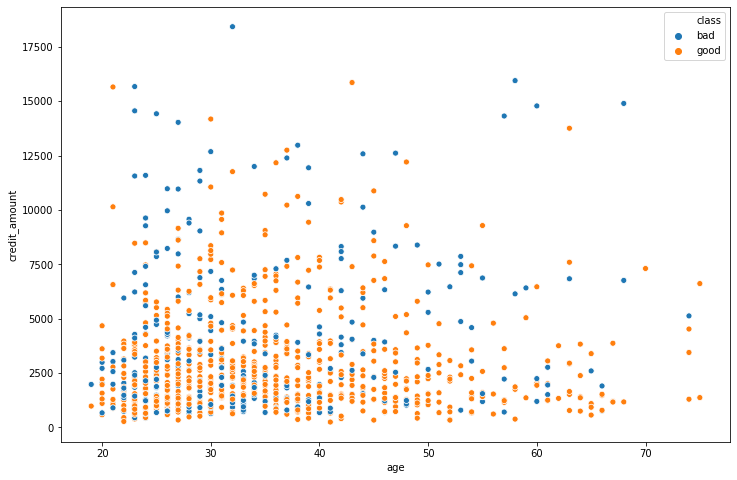

In [6]:
explanation_a = """no it is not easy to classify good vs bad using only the age and credit_amount columns, because
as can be seen in the plot, the data points are not separable , if they were separable , meaning two
separate celuster, then they could be classified easily just by these two columns"""
with open('explanation_a.txt', 'w') as f:
    f.write(explanation_a)
# plot the data df['age'],df['credit_amount']
df = load_credit()
plt.figure(figsize=(12,8))
sns.scatterplot(df['age'],df['credit_amount'],hue=df['class'])
plt.savefig('credit_age.png')

b

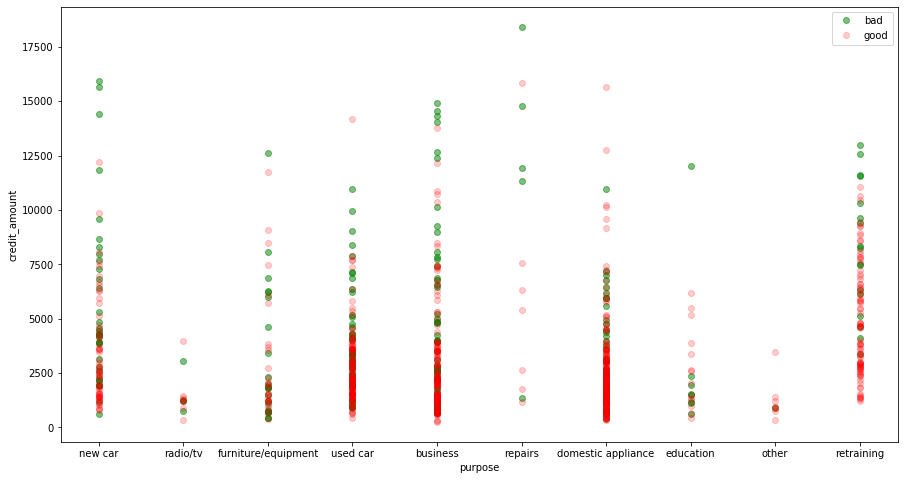

In [7]:
explanation_b = """the plot shows that none of the purposes is completely separable by the goods and bads. However, for 
'domestic appliance' & 'repairs' ,we can have the classification with the better approximation, they followed by 
'used car' which the goods are in the lower part of the plot whereas the bad are located in the higher amount of 
'credit_amount' axis"""
with open('explanation_b.txt', 'w') as f:
    f.write(explanation_b)

df = load_credit()
df_class_good = df[df['class']=='good']
df_class_bad = df[df['class']=='bad']

plt.figure(figsize=(15,8))
plt.plot(df_class_bad['purpose'],df_class_bad['credit_amount'], "ro", color="green", label = "bad",alpha=0.5)
plt.plot (df_class_good['purpose'],df_class_good['credit_amount'], "ro", color="red", label="good",alpha=0.2)
plt.xlabel ("purpose")
plt.ylabel ("credit_amount")
plt.legend()
plt.savefig('purpose.png')
plt.show()

## 3.) Classification on credit-g (3.5 points total)

In this task you should experiment with the different classifiers on sklearn.


### a) Preparation (0.5)

Write a function `preparation` that takes a dataframe like produced in 1 and prepares it for use with sklearn. The required steps are:

- compute the boolean target vector (True if 'class' is 'good')
- remove the target column from the dataframe
- convert the categorical variables to numeric ones using pd.get_dummies

Thereafter return 1) the prepared dataframe and 2) the target vector.

#### Talk about pd.get_dummies (0.75)

Explain what `pd.get_dummies` does. Thereby also talk about the drawbacks and or advantages of this method regarding in particular the `employment` column. Save the explanation in `dummies`. (Same rules apply as in 2.) for working with explanations). Also write the results to a file `dummies.txt`.

### b) Generic evaluation (1.5)

Write a function `my_eval` that takes 5 inputs. 1) A prepared dataframe, 2) the target vector 3) a sklearn classifier class 4) a dict of potential parameters to create a classifier instance from 5) a dict of parameters passed to the `.fit` function of a classifier.

The function instanciates a new classifier from the given class using the provided dict in 4). It then performs 10 fold cross validation of this classifier instance on the provided dataset and target vector providing the dict of fit parameters.

Thereafter the function returns a dict like so:
```python
{'precision': (0,1), # mean first then std
 'recall': (0,1)} # mean first then std
```
That contains the mean and std of precision and recall scores for the 10 fold cross validation.

### c) Application (0.75)

Experiment with different classifiers and different parameters for fitting.
As a result provide a list of tuples. Each tuple is a triplet of sklearn classifier class, a dict with keyword arguments passed when creating the classifier and another dict passed when using as the last argument to the function in c).

Store 3 of these triplets as a list in the variable `my_classifiers`. Try to find a tiplet that has high precision low recall, one with high recall and low precision and one relatively mixed.
Avoid triplets where evaluating in b) takes longer than 120s.

In [8]:
def preparation(df):
    import pandas as pd
    df['class'] = df['class']=='good'
    # the boolean target vector 
    target_vector = df['class']
    # remove the target column from the dataframe
    df_features = df.drop('class', axis=1)
    # convert the categorical variables to numeric ones
    df_features = pd.get_dummies(df_features)
    return df_features , target_vector


dummies = """What 'pd.get_dummies' does is to perform one-hot encoding, so 'pd.get_dummies' map each categorical column into
a vector that contains 1,0 showing whether the feature is present or not. 
Advantages: The reason why we use one-hot encoding ('pd.get_dummies') is because there are a some limited machine learning
algorithms, for example decision tree that can be learned directly from categorical data with no data transform required.
However many machine learning algorithms cannot work directly on labeled data, so they required all input variables and 
output variables to be numeric. Moreover, representing data in the form of dummy variables makes it easier to make decisions
based on them.

Drawbacks: because the Nr. of the vectors depends on the Nr. of categories for features, as a results this methods generates
a lot of columns which decelerate the learning considerably if the Nr. of category is very high for the feature"""
with open('dummies.txt', 'w') as f:
    f.write(dummies)

In [122]:
def my_eval(X,y,clf,classifier_parameters={},fit_parameters={}):
    from sklearn import preprocessing
    from sklearn.model_selection import cross_val_score
    scaler = preprocessing.StandardScaler().fit(X_train)
    X = scaler.transform(X)
    
    clf(**classifier_parameters).fit(X[:20],y[:20],**fit_parameters)
    
    output = {'precision': (0,1), # mean first then std
          'recall': (0,1)} # mean first then std
    return output

In [130]:
df = load_credit()
X,y = preparation(df)
#my_eval(X,y,clf=SVC)

from sklearn.svm import SVC
classifier_parameters = {"kernel":'linear', 'C':1}
clf = SVC
from sklearn.model_selection import cross_val_score

%time scores = cross_val_score(clf,X,y,cv=10,fit_params={})
clf(**classifier_parameters)

TypeError: Cannot clone object '<class 'sklearn.svm._classes.SVC'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
"""The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0."""

from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall = recall_score(y_true, y_pred, average=None)
recall,recall.mean() , recall.std()

(array([1., 0., 0.]), 0.3333333333333333, 0.4714045207910317)

## 4.) Classification discrimination (4 points total)

Recently the is quite some interest on the topic of discrimination/fairness in machine learning. In this tasky you will explore a very *crude* example of evaluating fairness in machine learning.

### a) Preparation (1)

Write a function `prepare_fairness` that takes a loaded credit-g dataframe like in task 1.a) and prepares it for this analysis. Therefor replace the column `'personal_status'` with a column called `'gender'` that has two values of male and female only. (Replace = remove and add a new one)
Thereafter take all the females and append a *random sample* of males use a seed of 1. Thereafter they should be equally many males and females.
Use `pd.get_dummies` to transform categorical columns to numerical ones.
Finally return the result of a 50/50 train test split, use a seed of 1.

### b) A crude notion of discrimination (2)

Write a function `eval_fairness` that takes a classifier instance, a dict with arguments passed to the fit method, and the 4 arguments obtained from sklearn `train_test_split` in the same order.

Train the classifier on the training examples. Now on the test examples compute the fraction of females/males that have been predicted 'good' with respect to all females/males. Now swap the gender of all the test instances and let the classifier predict again. Compute the same fractions. 

Return a dict:
```python
{'frac_females' : 0, # fraction of 'good' predicted females
 'frac_males' : 0, # fraction of 'good' predicted males
 'frac_females_swap' : 0.0, # fraction of 'good' predicted former females (males after swap
 'frac_males_swap' : 0} # fraction of 'good' predicted fomer males (females after swap)
```

Apply this procedure to the three classifiers from 3b)

#### Is any of the classifiers discriminating? (1)

Argue whether any of the classifiers are discriminating.
Also argue what drawbacks this notion/procedure for evaluating discrimination has.
Store the argument as a string in the variable `discrimination` and also write it to a file `discrimination.txt`

In [12]:
def prepare_fairness(df):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn import preprocessing
    
    df['gender'] = df['personal_status']
    # remove the column "personal_status"
    df = df.drop(["personal_status"], axis=1)

    dict_gender = {'male div/sep':'male','male mar/wid':'male','male single':'male','female div/dep/mar':'female'}
    # make the column 'gender' to have two values of male and female only. 
    df['gender'] = df['gender'].apply(lambda x: dict_gender[x])

    # form the data frame 'df_male' that contains only 'male' and sampled with the size of number of 'female' 
    # so at the end  in df there will be len(df[df['gender']=='male']) == len(df[df['gender']=='female'])
    df_male =df[df['gender']=='male'].sample(n=len(df[df['gender']=='female']), random_state=1)
    
    # remove all the 'male' from data frame 'df'
    df = df[df['gender']=='female']
    
    # concatenate all the 'female' and sampled 'male'
    df = df.append(df_male)
    
    labels = df['class']
    labels = preprocessing.LabelEncoder().fit_transform(labels)
    y = labels
    df_features = df.drop("class", axis=1)
    df_features = pd.get_dummies(df_features)
    X = df_features.values
    X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=.5 , random_state=1)
    return X_train , X_test , y_train , y_test

In [13]:
def eval_fairness(X_train , X_test , y_train , y_test):
    pass

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.


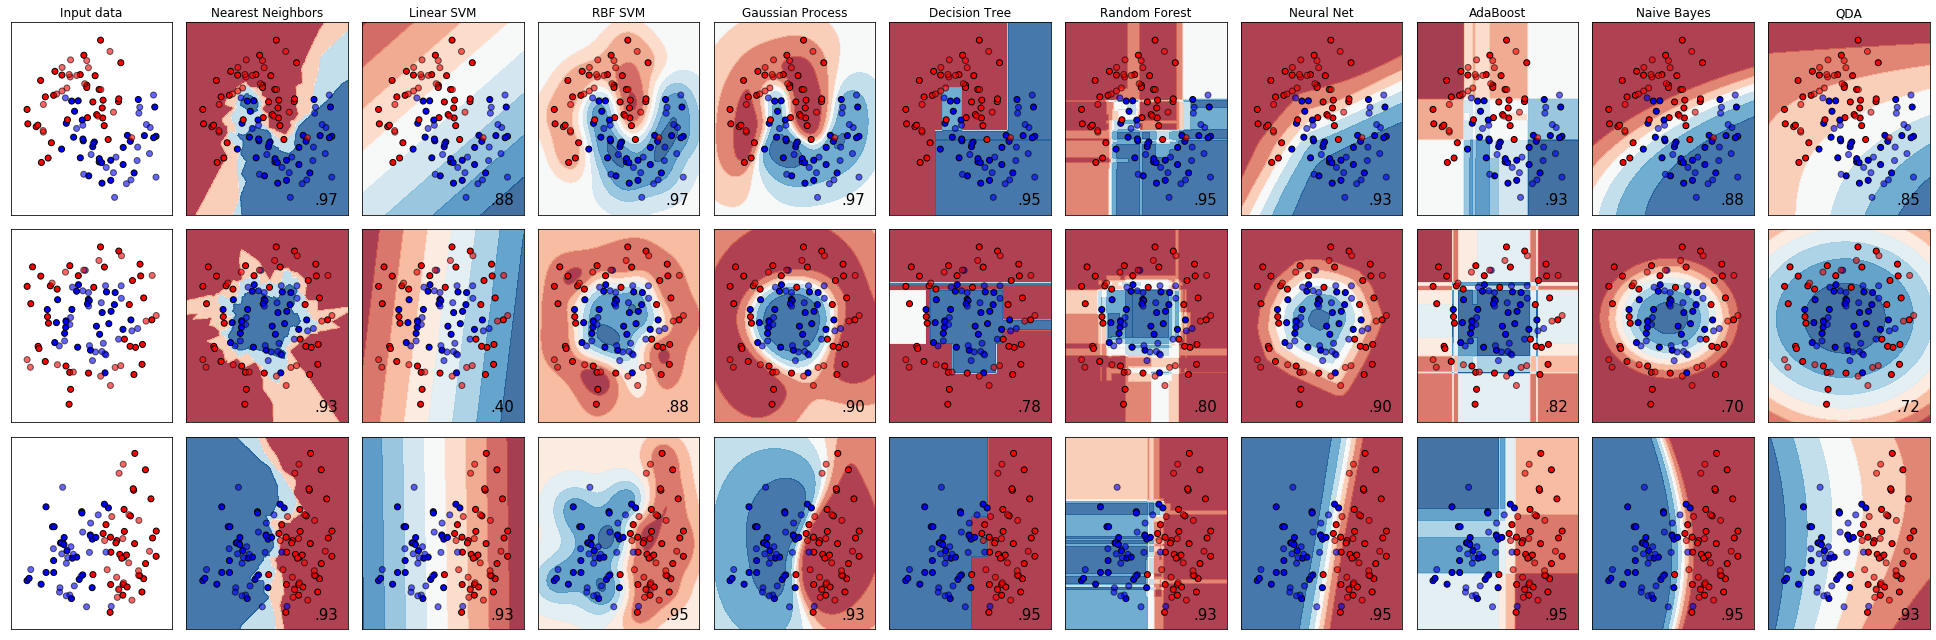

In [14]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()